# Exercício sobre Clusterização

Para este exercício, usaremos o conjunto de dados do Titanic (disponível [aqui](https://www.kaggle.com/c/titanic)). 

Antes de prosseguir, vamos discutir alguns fatos sobre os dados em si. O naufrágio do RMS Titanic é um dos mais infames naufrágios da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou depois de colidir com um iceberg, matando 1502 de 2224 passageiros e tripulantes. Esta tragédia chocou a comunidade internacional e levou a melhores normas de segurança para os navios.

Uma das razões pelas quais o naufrágio causou tal perda de vida foi que não havia botes salva-vidas suficientes para os passageiros e a tripulação. Embora tenha havido algum elemento de sorte envolvido na sobrevivência do naufrágio, alguns grupos de pessoas tiveram maior probabilidade de sobreviver do que outros, como mulheres, crianças e a classe-alta.

Agora, falando sobre o conjunto de dados, o conjunto de treinamento contém vários registros sobre os passageiros do Titanic (daí o nome do conjunto de dados). Ele possui 12 variáveis que capturam informações tais como `passenger_class`, `port_of_Embarkation`, `passenger_fare`, etc. O rótulo do conjunto de dados é a **Survival**, que denota o status de sobrevivência de um passageiro em particular. Sua tarefa é agrupar os registros em dois, ou seja, os que sobreviveram e os que não sobreviveram.

Você pode estar pensando que, como é um conjunto de dados rotulado, como poderia ser usado para uma tarefa de cluster? Você só precisa abandonar a coluna “survival” do conjunto de dados e torná-lo não rotulado. Será tarefa do K-Means agrupar os registros dos conjuntos de dados se eles sobreviverem ou não.

Para este tutorial, você precisará dos seguintes pacotes do Python: pandas, NumPy, scikit-learn, Seaborn e Matplotlib.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importamos todas as dependências que serão necessárias neste exercício. (Você pode incluir outras se achar que seja necessário ou que torna mais fácil o trabalho.) 

Agora, você carregará o conjunto de dados. Baixe os arquivos de treinamento e de teste do site indicado acima e carregue-os dois dataframes chamados `train` e `test`, respectivamente.

In [2]:
# Carregar os conjuntos de dados de treinamento e de teste
# !ls *csv
# gender = pd.read_csv('gender_submission.csv')
test = pd.read_csv('test.csv', index_col='PassengerId')
train = pd.read_csv('train.csv', index_col='PassengerId')

Vamos visualizar o tipo de dados com o qual você trabalhará imprimindo algumas amostras dos dataframes de treinameto e de teste.

In [3]:
# Exiba as primeiras linhas dos datasets de treinamento e de teste.
# treinamento
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
# Exiba as primeiras linhas dos datasets de treinamento e de teste.
# teste
test.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


Você pode obter algumas estatísticas iniciais dataset de treinamento e de teste usando o método `describe()` do Pandas.

In [5]:
# Descreva os conjuntos de dados de treinamento e teste.
# treinamento
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Descreva os conjuntos de dados de treinamento e teste.
# treinamento
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


Assim, a partir dos resultados acima, você é possível conhecer as variáveis do conjunto de dados e algumas estatísticas básicas delas. Liste os nomes das variáveis (colunas) do conjunto de dados.

In [7]:
# Liste as colunas do conjunto de dados
test_columns = test.columns.tolist()
train_columns = test.columns.tolist()

print('test columns:', test_columns,
      '\ntrain columns:', train_columns)

test columns: ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'] 
train columns: ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


É muito importante observar que nem todos os algoritmos de aprendizado de máquina suportam valores ausentes nos dados que eles recebem. O K-means é um deles. Portanto, precisamos tratar os valores ausentes nos dados. Vamos primeiro ver onde estão os valores ausentes:

In [8]:
# Use os métodos isna() e sum() para identificar quantos 
# valores ausentes existem em cada coluna do conjunto de 
# dados de treinamento.
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
# Use os métodos isna() e sum() para identificar quantos 
# valores ausentes existem em cada coluna do conjunto de 
# dados de teste.
test.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

Seu código deve ter mostrado que no conjunto de treinamento as colunas `Age`, `Cabin` e `Embarked`, estão faltando valores, e no conjunto de testes, as colunas `Age` e `Cabine` contêm valores ausentes.

Existem algumas maneiras de lidar com valores ausentes:

- Remover linhas com valores ausentes
- Impute valores ausentes

Tipicamente o último é preferível, porque removermos as linhas com valores ausentes, isso poderá causar insuficiência nos dados, o que, por sua vez, resultará em treinamento ineficiente do modelo de aprendizado de máquina.

Agora, existem várias maneiras de executar a imputação:

- Um valor constante que possui significado dentro do domínio, como 0, distinto de todos os outros valores.
- Um valor de outro registro selecionado aleatoriamente.
- Um valor médio, mediano ou de moda para a coluna.
- Um valor estimado por outro modelo de aprendizado de máquina.

Qualquer imputação executada no conjunto de treinamento terá que ser executada nos dados de teste no futuro, quando forem necessárias previsões do modelo final de aprendizado de máquina. Isso precisa ser levado em consideração ao escolher como imputar os valores ausentes.

O Pandas fornece a função `fillna()` para substituir valores ausentes por um valor específico. Vamos aplicar essa função com Imputação de Média.

In [10]:
# Use a função fillna() para preencher os valores ausentes com a média no dataframe de treinamento.
train = train.fillna(train.mean())

In [11]:
# Use a função fillna() para preencher os valores ausentes com a média no dataframe de teste.
test = test.fillna(test.mean())

Agora que você imputou os valores ausentes no conjunto de dados, é hora de ver se o conjunto de dados ainda tem algum valor ausente.

In [12]:
# Verifique se ainda há dados ausentes no conjunto de treinamento.
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
# Verifique se ainda há dados ausentes no conjunto de testes.
test.isna().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64

Como seu código deve ter mostrado, ainda há alguns valores ausentes nas colunas `Cabin` e `Embarked`. Isso ocorre porque esses valores não são numéricos. Para realizar a imputação de média, os valores precisam estar em formato numérico. Existem maneiras de converter um valor não numérico para um valor numérico. Falaremos mais sobre isso depois.

Vamos fazer mais algumas análises para entender melhor os dados. A compreensão é realmente necessária para executar qualquer tarefa de Aprendizado de Máquina. Vamos começar descobrindo quais recursos são categóricos e quais são numéricos.

- Categórico: `Survival`,` Sexo` e `Embarked`
- Ordinal: `Pclass`.
- Contínuo: `Idade`, `Fare`.
- Discreto: `SibSp`,` Parch`.

Duas características são deixadas de fora, as quais não estão listadas acima em nenhuma das categorias. Sim, você adivinhou certo, `Ticket` e` Cabin`. `Ticket` é uma mistura de tipos de dados numéricos e alfanuméricos. `Cabin` é alfanumérico. Vamos ver alguns valores de amostra.

In [14]:
# Liste os primeiros valores da coluna Ticket no dataframe de treinamento
train['Ticket'].head(5)

PassengerId
1           A/5 21171
2            PC 17599
3    STON/O2. 3101282
4              113803
5              373450
Name: Ticket, dtype: object

In [15]:
# Liste os primeiros valores da coluna Cabin no dataframe de treinamento
train['Cabin'].head(5)

PassengerId
1     NaN
2     C85
3     NaN
4    C123
5     NaN
Name: Cabin, dtype: object

Por hora, vamos deixar os dados como estão.

Agora vamos ver a contagem de sobrevivência dos passageiros em relação as seguintes características:

- Pclass
- Sex
- SibSp
- Parch

Vamos fazer isso um por um:

Contagem de sobrevivência em relação a `Pclass`:

In [16]:
# Calcule a média de sobreviventes, agrupado pelo valor de Pclass
# O resultado deve ser um dataframe com uma coluna para Pclass e 
# outra para a média de Suvived, ordenado por Survived.
train_pclass = train.groupby('Pclass')['Survived'].mean()
train_pclass

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Contagem de sobrevivência em relação a `Sex`:

In [17]:
# Calcule a média de sobreviventes, agrupado pelo valor de Sex.
# O resultado deve ser um dataframe com uma coluna para Sex e 
# outra para a média de Suvived, ordenado por Survived.
train_sex = train.groupby('Sex')['Survived'].mean()
train_sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Contegem de sobrevivência em relação a `SibSp` (número de irmãos ou conjuges embarcados no navio):

In [18]:
# Calcule a média de sobreviventes, agrupado pelo valor de SibSp
# O resultado deve ser um dataframe com uma coluna para SibSp e 
# outra para a média de Suvived, ordenado por Survived.
train_sibsp = train.groupby('SibSp')['Survived'].mean()
train_sibsp

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

Contagem de sobreviventes em relação a `Parch` (número de pais ou filhos embarcados no navio):

In [19]:
# Calcule a média de sobreviventes, agrupado pelo valor de Parch
# O resultado deve ser um dataframe com uma coluna para Parch e 
# outra para a média de Suvived, ordenado por Survived.
train_parch = train.groupby('Parch')['Survived'].mean()
train_parch

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

Para explorar a relação entre idade e sobrevivência iremos plotar o histograma de distribuição de sobrevivência por idade. Faremos dois gráficos, um para `suvived=0` e outro para `survived=1`.

Para simplificar o desenho dos dois diagrama utilize o padrão de código mostrado abaixo:
```
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)
```

A primeira função, `FaceGrid`, cria uma grade de gráficos. Nessa grade as colunas serão definidas pelos valores da coluna `Survived`. Também é possível especificar linhas com o parâmetro `row=NomeDaColuna`. A segunda função `g.map` irá criar cada um dos gráficos do grid, neste caso usando a função `plt.hist`, com dados distribuídos por `Age`.


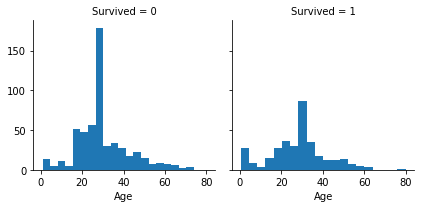

In [20]:
# Plote os histogramas de sobrevivência por idade.
import seaborn as sns
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Agora vamos analisar o efeito da classe de passagem na sobrevivência dos passageiros, conjuntamente com a distribuição por idade.

Utilize novamente a função `FaceGrid`, mas desta vez além de  `col='Survived'`, especifique também `row='Pclass'` como parâmetro. Isso deverá gerar um grid de 3 linhas (uma para cada valor de `Pclass`) por 2 colunas (uma para cada valor de `Survived`).


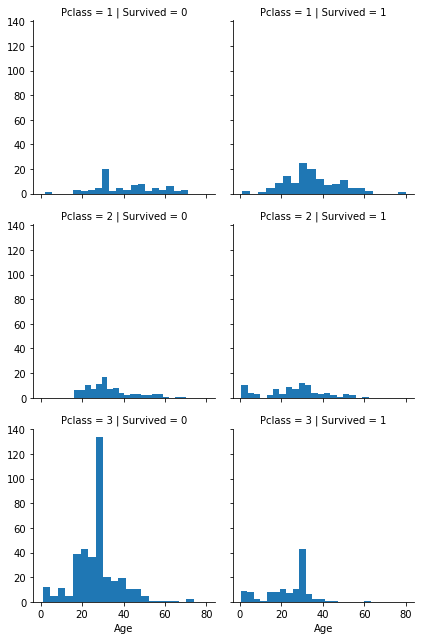

In [21]:
# Plote os histogramas de sobrevivência por classe e idade.
g = sns.FacetGrid(train, row='Pclass', col='Survived')
g.map(plt.hist, 'Age', bins=20)

**Descreva suas conclusões preliminares sobre o que os dados revelaram até agora:**

R: Os passageiros de terceira classe apresentaram menor índice de sobrevivência entre os grupos (e também o mais populoso, em especial jovens entre 20 e 30 anos), e os passageiros de primeira classe, o maior.

Já os passageiros de segunda classe encontram-se razoavelmente equiparados entre sobreviventes e não sobreviventes.

O fato mais notável, porém, é que apenas entre os passageiros de primeira classe o número de sobreviventes aparenta ser maior que o de não sobreviventes. 

$\Diamond$


Chega de visualização e análise por enquanto. Vamos realmente construir um modelo K-Means com o conjunto de treinamento. Mas antes disso, também precisaremos de alguns pré-processamentos de dados. Podemos ver que nem todos os valores de características são do mesmo tipo. Alguns deles são numéricos e alguns deles não são. Para facilitar o cálculo, serão fornecidos apenas dados numéricos para o modelo. Vamos ver os tipos de dados temos para as diferentes caracteísticas:

In [22]:
# Utilize a função info() no dataset de treinamento para descrever os dados
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Assim, você pode ver que os seguintes recursos não são numéricos:

- Name
- Sex
- Ticket
- Cabin
- Embarked

Antes de convertê-los em números, podemos querer fazer um pouco de engenharia de características, ou seja, acreditamos que características como `Name`, `Ticket`, `Cabin` e `Embarked` não têm qualquer impacto sobre o status de sobrevivência dos passageiros. Muitas vezes, é melhor treinar seu modelo apenas com características significativas do que treiná-lo com todas as características, incluindo as desnecessárias. Isso não só ajuda na modelagem eficiente, mas também o treinamento do modelo pode acontecer em muito menos tempo. Assim, para este exercício, as características `Name`, `Ticket`, `Cabin` e `Embarked` podem ser descartadas e não terão impacto significativo no treinamento do modelo K-Means.


In [23]:
# Remova as colunas ['Name','Ticket', 'Cabin','Embarked'] do dataset de treinamento
for i in ['Name', 'Ticket', 'Cabin', 'Embarked']:
    train.pop(i)

In [24]:
# Remova as colunas ['Name','Ticket', 'Cabin','Embarked'] do dataset de testes
for i in ['Name', 'Ticket', 'Cabin', 'Embarked']:
    test.pop(i)

Agora que a parte de remoção foi concluída, vamos converter a característica `Sex` para numérico (somente `Sex` permanece como uma característica não-numérica). Você fará isso usando uma técnica chamada [Label Encoding](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

O Scikit-Learn implementa um algoritmo de codificação de rótulos (label encoding) através da classe `LabelEncoding` no pacote `sklearn.preprocessing`. A utilização da classe segue o seguinte padrão:

```
labelEncoder = LabelEncoder()
labelEncoder.fit(df['colName'])
df['colName'] = labelEncoder.transform(df['colName'])
```

Note que se desejarmos, como é o caso, utilizar a mesma codificação de rótulos tanto para a base de treinamento quanto para a base de testes, devemos fazer primeiro todo o ajuste do codificador, i.e., chamar a função `fit()` no treinamento, e depois, utilizando o mesmo codificador, fazer a transformação tanto do dataset de treinamento quanto do dataset de teste.


In [25]:
# Condifique os rótulos da coluna Sex nos datasets de treinamento e de teste
labelEncoder = LabelEncoder() # alias

# transformação do dataset de teste
labelEncoder.fit(test['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])

# transformação do dataset de treinamento
labelEncoder.fit(train['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])

Verifique novamente as informações sobre os conjuntos de dados para ter certeza de que, agora, todas as características são numéricas.

In [26]:
# Utilize a função info() para verificar os tipos de 
# dados das características dos datasets.
# teste
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 6 columns):
Pclass    418 non-null int64
Sex       418 non-null int64
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      418 non-null float64
dtypes: float64(2), int64(4)
memory usage: 22.9 KB


In [27]:
# Utilize a função info() para verificar os tipos de 
# dados das características dos datasets.
# Utilize a função info() para verificar os tipos de 
# dados das características dos datasets.
# treinamento
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(5)
memory usage: 55.7 KB


Muito bem. Parece que agora já podemos treinar o modelo K-Means.

Primeiro vamos eliminar a coluna `Survived` dos dados com a função `drop()` e transformar os dados em uma array do NumPy (que é o tipo de dados que o KMeans espera). Isso pode ser feito com o seguinte código:
```
X = np.array(train.drop(['Survived'], 1).astype(float))
```
Também vamos precisar guardar os valores da característica `Survived` para comparar com os valores de rótulos gerados pelo K-means. Podemos faxer isso com o código abaixo:
```
y = np.array(train['Survived'])
```
Uma vez que os dados estejam preparados, podemos agora construir o modelo K-means. Especificaremos dois clusteres pois queremos agrupar os dados em duas categorias, correspondendo aos grupos dos que sobreviveram e dos que não sobreviveram. Nossa conjectura é que haja semelhanças suficientes entre os dados para permitir esse agrupamento.

Prepare os dados e crie o modelo K-means.

In [28]:
# Prepare os dados X e y para treinamento e validação do modelo
y = np.array(train['Survived'])
X = np.array(train.drop(['Survived'], 1).astype(float)) # <-- é isso mesmo?

In [29]:
# Crie o modelo K-means
kmeans = KMeans(n_clusters=2) # sobreviventes e não-sobreviventes
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
# Verificação dos centróides
kmeans.cluster_centers_

array([[  2.39140811,   0.66587112,  29.56980696,   0.51431981,
          0.349642  ,  22.41194248],
       [  1.        ,   0.35849057,  31.74369034,   0.66037736,
          0.88679245, 187.03285849]])

In [31]:
# Verificação dos clusters
kmeans.labels_[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

Agora que temo um modelo K-means para o nosso conjunto de dados, utilize a função `predict(X)` para obter os rótulos previstos pelo modelo e calcular o nível de acurácia do modelo. O nível de acurácia é obtido dividindo-se o número de previsões corretas pelo número total de instâncias. Para calcular a acurácia você terá que comparar os rótulos previstos com os rótulos guardados em `y`.

In [32]:
# Calcule os rótulos previstos
labels = kmeans.predict(X)

In [33]:
# Calcule a acurácia do seu modelo
from sklearn.metrics import accuracy_score
accuracy_score(labels, y)

0.6442199775533108

Provavelmente, você obteve uma acurácia em torno de 50%. Considerando-se que os dados estão bastante desbalanceados, i.e., o cluster correspondendo a `Survived = 0` contém muito mais elementos do que o cluster com `Survived = 1`, até que o resultado não está tão ruim. Entretanto, também não está muito bom.

Uma possível fonte de dificuldade para o algoritmo do K-means é o fato de as características estarem com escalas diferentes, i.e., as características do conjunto de dados contêm diferentes intervalos de valores. Então, o que acontece é que uma pequena alteração em uma característica pode não ser significativa em comparação com as outras características. Portanto, também é importante dimensionar os valores das características para um mesmo intervalo.

Vamos fazer isso agora e, para esse experimento, usaremos o intervalo de 0 a 1 como o intervalo de valores uniformes em todos os recursos. O código que implementa esta normalização é dados abaixo.

```
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
```

Execute este código, gere novamente um modelo K-means, desta vez para o modelo escalonado, e calcule novamente a acurácia do modelo.

In [34]:
# Gere a versão normalizada dos dados de treinamento
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
# Gere o modelo K-means para a versão normalizada dos dados
kmeans2 = KMeans(n_clusters=2) # sobreviventes e não-sobreviventes
kmeans2.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
# Calcule a acurácia do modelo com os dados normalizados
labels_scaled = kmeans2.predict(X_scaled)
accuracy_score(labels_scaled, y)

0.2132435465768799

A acurácia deve ter melhorado mas, provavelmente, ainda deve estar na casa dos 65%, talvez menos. 

Que outra(s) técnica(s) você poderia utilizar para tentar melhorar a acurácia do seu modelo de predição?

**Resposta:**

Podemos utilizar outros algoritmos para tentar predizer a sobrevivência dos passageiros. Entre estes, os dferentes métodos de kernel para aprendizado de máquina, e técnicas de agrupamento espectral (spectral clustering).

Ou ainda, a fim de aprofundarmos mais no uso do algoritmo já utilizado, talvez possamos verificar pelo método da silhueta ou do "cotovelo" se o valor ótimo de clusters a ser considerado é mesmo 2, ou se deveríamos tentar a clusterização por k-means utilizando um outro valor k.

$\Diamond$

Implemente a(s) técnicas que você descreveu acima e verifique se foi ou não possível melhorar o modelo.

In [37]:
# Implemente as suas técnicas. Utilize quantas células achar necessário.
from sklearn.cluster import SpectralClustering

# affinity:
# default - 'nearest_neighbors’, ‘precomputed’, ‘rbf
# ‘additive_chi2’ - sklearn.pairwise.additive_chi2_kernel
# ‘chi2’ - sklearn.pairwise.chi2_kernel
# ‘linear’ - sklearn.pairwise.linear_kernel
# ‘poly’ - sklearn.pairwise.polynomial_kernel
# ‘polynomial’ - sklearn.pairwise.polynomial_kernel
# ‘rbf’ - sklearn.pairwise.rbf_kernel
# ‘laplacian’ - sklearn.pairwise.laplacian_kernel
# ‘sigmoid’ - sklearn.pairwise.sigmoid_kernel
# ‘cosine’ - sklearn.pairwise.cosine_similarity

affinity_default = ['nearest_neighbors', 'precomputed', 'rbf']
affinity_kernels = ['additive_chi2', 'chi2', 'linear', 'poly', 'polynomial', 'rbf', 'laplacian', 'sigmoid', 'cosine']

accuracy = {}

for a in affinity_default+affinity_kernels:
    
    try:
        model = SpectralClustering(n_clusters=2, # <-- sobreviventes/não sobreviventes
                                   affinity=a, # <-- aproximação por método de kernel
                                   assign_labels='kmeans')

        accuracy[a] = accuracy_score(model.fit_predict(X_scaled), y)
    
    except ValueError as e: # pass
        print(a, '=>', str(e))

print('affinity \t\t accuracy')
for k,v in sorted(accuracy.items(), key=lambda x:x[1], reverse=True):
    print(k, '     \t'*(1 if len(k)>9 else 2), v)

/home/neo/.anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


precomputed => array must be 2-dimensional and square. shape = (891, 6)
additive_chi2 => array must not contain infs or NaNs


/home/neo/.anaconda3/lib/python3.6/site-packages/scipy/sparse/csgraph/_laplacian.py:120: RuntimeWarning: invalid value encountered in sqrt
  w = np.where(isolated_node_mask, 1, np.sqrt(w))


affinity 		 accuracy
rbf      	     	 0.7867564534231201
poly      	     	 0.7867564534231201
polynomial      	 0.7867564534231201
linear      	     	 0.6868686868686869
nearest_neighbors      	 0.41975308641975306
sigmoid      	     	 0.31200897867564537
cosine      	     	 0.2850729517396184
chi2      	     	 0.2132435465768799
laplacian      	     	 0.2132435465768799


# 6. Conclusão

Neste exercício arranhamos a superfície de uma das técnicas de clusterização mais populares, o K-Means. Se você gostaria de aprender mais sobre essas técnicas de agrupamento, eu recomendo que você confira a página da Wikipédia.com sobre [k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering), e a página do [K-Means no Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

Também é interessante notar que, embora possamos usar essa técnica com algum sucesso, o K-Means não seria a técnica mais indicada para resolver este problema específico.